# Project IRWA

Estellers, Oriol - 242142

Fuentes, Raimon - 242176
  
Ribas, Pol - 241620

## Packages and imports

In [1]:
!pip install spacy

In [2]:
!python -m spacy download en_core_web_sm

2023-10-21 17:52:07.180452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 17:52:09.470478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=a299de78673f54d06e5fb120223d852308ea1b936ab3c3325a5447c3cec8c094
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [4]:
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=7827c53efc40cca61b5d6ef6c6ecc1b0b2287e22fe466774a02bffa47cd51d0f
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [5]:
!pip install wordcloud

In [6]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
import os
from numpy import linalg as la
import pandas as pd
import re
from num2words import num2words
import string
from cleantext import clean
import emoji
import regex
from nltk.tokenize import TweetTokenizer
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import spacy
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load Data to memory

In [7]:
df = pd.read_json('https://raw.githubusercontent.com/Oriesdo/IRWA-2023-242142-241620-242176/main/IRWA_data_2023/Rus_Ukr_war_data.json', lines = True)
print("Total number of Tweets in the corpus: {}".format(len(df)))
df.head(3)

Total number of Tweets in the corpus: 4000


,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,2022-09-30 18:39:17+00:00,1575918221013979136,1575918221013979136,@MelSimmonsFCDO Wrong. Dictator Putin's Fascis...,False,"[16, 149]","{'hashtags': [{'text': 'RussiainvadesUkraine',...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.575767e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-30 18:38:44+00:00,1575918081461080065,1575918081461080064,🇺🇦❤️ The Armed Forces liberated the village of...,False,"[0, 265]","{'hashtags': [{'text': 'Drobysheve', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,"{'media': [{'id': 1575918030638530581, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2022-09-30 18:38:23+00:00,1575917992390823936,1575917992390823936,ALERT 🚨Poland preps anti-radiation tablets ove...,False,"[0, 133]","{'hashtags': [{'text': 'NATO', 'indices': [64,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing of documents

In [8]:
from nltk.draw.util import Text
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    ## START CODE
    line = line.lower() # transform text to lowercase
    line = re.sub(r'[!"$%&()*+,-./:;<=>?[\]^_`{|}~]', '', line) # remove punctuation marks
    tokenizer = TweetTokenizer()
    line = tokenizer.tokenize(line) # tokenize the text to get a list of terms
    line = [x for x in line if x not in stop_words]  # eliminate the stopwords
    line = [stemmer.stem(word) for word in line] # perform stemming
    line = [re.sub(r'\d+', lambda match: num2words( match.group(0), to = 'cardinal' ), word) for word in line] # convert nums to cardinal words
    line = [clean(word, no_emoji=True) for word in line] # delete emojis
    i = 0
    while i < len(line): # delete empty spaces
      if(len(line[i]) == 0):
          del line[i]
          i=i-1
      i = i+1
    text_concat = ''
    for word in line:
      text_concat += word + ' '
    ## END CODE

    return text_concat

In [9]:
# creating column with the normalized tweets
norm = []
for i in range(len(df)):
  norm.append(build_terms(df.iloc[i]['full_text']))

df['normalized'] = norm

In [10]:
df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries,normalized
0,2022-09-30 18:39:17+00:00,1575918221013979136,1575918221013979136,@MelSimmonsFCDO Wrong. Dictator Putin's Fascis...,False,"[16, 149]","{'hashtags': [{'text': 'RussiainvadesUkraine',...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.575767e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,@melsimmonsfcdo wrong dictat putin' fascist ru...
1,2022-09-30 18:38:44+00:00,1575918081461080065,1575918081461080064,🇺🇦❤️ The Armed Forces liberated the village of...,False,"[0, 265]","{'hashtags': [{'text': 'Drobysheve', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,"{'media': [{'id': 1575918030638530581, 'id_str...",0.0,NaN,NaN,NaN,NaN,arm forc liber villag #drobyshev #lymansk urba...
2,2022-09-30 18:38:23+00:00,1575917992390823936,1575917992390823936,ALERT 🚨Poland preps anti-radiation tablets ove...,False,"[0, 133]","{'hashtags': [{'text': 'NATO', 'indices': [64,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,alert poland prep antiradi tablet nuclear thre...


## Exploratory Data Analysis

In [11]:
# AVERAGE NUMBER OF WORDS PER TWEET


num_words = []
for i in range(len(df)): # loop to iterate through all the tweets
  tweet = df.iloc[i]['normalized']
  tweet = tweet.split('https') # we split so as to not count the links
  num_words.append(len(tweet[0].split(" "))) # we store the length of the tweet
avg_words = np.average(num_words) # computing the average
std_dev = np.std(num_words) # computing the standard deviation
print("The average number of words per tweet is", round(avg_words,2))
print("With a standard deviation of", round(std_dev,2))

The average number of words per tweet is 17.9
With a standard deviation of 7.59


In [12]:
# TOP-5 HASHTAGS


hashtag_dict = {} # dictionary to store the occurences of all hashtags
for k in range(len(df)): # iterate through all tweets
  line = df.iloc[k]['normalized']
  for i in range(len(line)): # iterate through each letter of the tweet
    if line[i] == '#': # if it is a hashtag
      hashtag = ''
      j = i
      while j < len(line) and line[j] != ' ': # loop to iterate through all the letters after the hashtag
        hashtag += line[j]
        j += 1
      if hashtag in hashtag_dict: # checking if that hashtag is already in the dictionary
        hashtag_dict[hashtag] += 1
      else: # if not, we add it
        hashtag_dict[hashtag] = 1
res = dict(sorted(hashtag_dict.items(), key = lambda x: x[1], reverse = True)[:5]) # get the top-5 most used hashtags
print("The top 5 hashtags used are  " + str(res))

The top 5 hashtags used are  {'#ukrainerussiawar': 4012, '#ukrain': 2163, '#ukrainewar': 1326, '#russia': 1232, '#russian': 724}


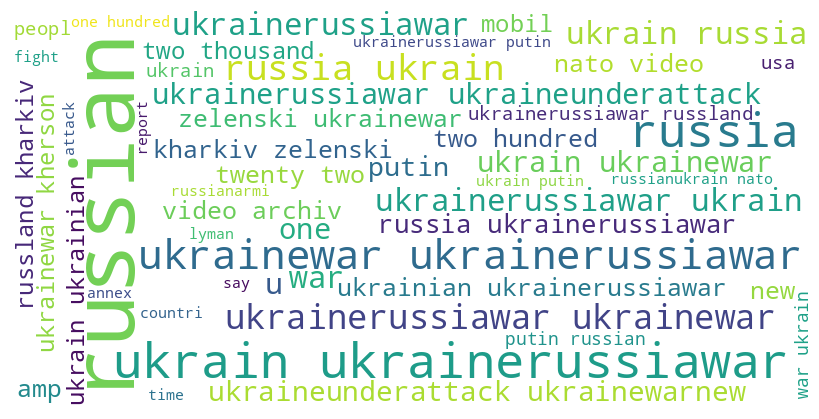

In [13]:
# TOP-50 MOST USED WORDS WITH WORD CLOUD


all_tweets_together = " ".join(df.iloc[:]['normalized']) # we put all the normalized tweets into a single sentence

words_without_http = ' '.join(word for word in all_tweets_together.split() if not word.startswith('http')) # we remove the words starting with 'http'

wordcloud = WordCloud(width=800, height=400, # generating the word cloud
                      background_color='white',
                      min_font_size=10,
                      max_words=50).generate(words_without_http)

plt.figure(figsize=(8, 8), facecolor=None) # display the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

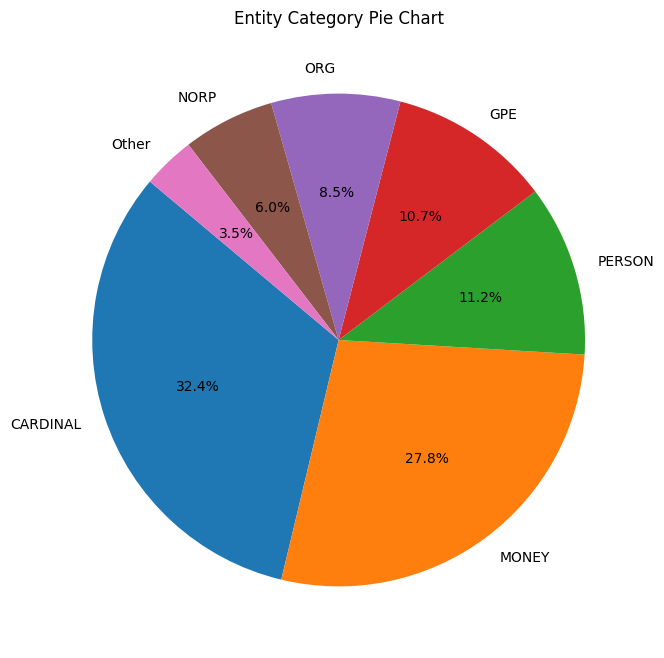

In [14]:
# ENTITY RECOGNITION


nlp = spacy.load('en_core_web_sm') # load the English language model

text = " ".join(df.iloc[:]['normalized'])
doc = nlp(text)
entity_counter = Counter(ent.label_ for ent in doc.ents)  # extract and count named entities

sorted_entities = sorted(entity_counter.items(), key=lambda x: x[1], reverse=True) # sort increasingly

# we will group the entities with less than 6% into the category "the"
threshold = 6  # set the threshold percentage
total_count = sum(entity_counter.values())
other_count = sum(count for label, count in sorted_entities if (count / total_count) < threshold / 100)

# filter entities that belong to the <6% group
filtered_entities = [(label, count) for label, count in sorted_entities if (count / total_count) >= threshold / 100]

filtered_entities.append(('Other', other_count)) # add "Other" category to the entities

entity_labels, entity_counts = zip(*filtered_entities)

plt.figure(figsize=(8, 8)) # create pie chart
plt.pie(entity_counts, labels=entity_labels, autopct='%1.1f%%', startangle=140)
plt.title("Entity Category Pie Chart")
plt.show()

In [15]:
# VOCABULARY SIZE


unique_vocab = {} # dictionary to store all the unique words
for k in range(len(df)): # we iterate through all the tweets
  line = df.iloc[k]['normalized'].split(" ") # we split the tweet by words
  for word in line:
    if word in unique_vocab: # checking if the word is in the dictionary
      unique_vocab[word] +=1
    else: # if not we add them
      unique_vocab[word] = 1
print("The vocabulary size of the normalized tweets is", len(unique_vocab))
print("The average number of unique words per tweet is", round(len(unique_vocab)/len(df), 2))
print("The percentage of unique words per each tweet is", round(((len(unique_vocab)/len(df))/(round(avg_words,2)))*100, 2),"%")

The vocabulary size of the normalized tweets is 13581
The average number of unique words per tweet is 3.4
The percentage of unique words per each tweet is 18.97 %


In [16]:
# HISTOGRAM OF EMOJIS USED


# these are the codes of the list of emojis that we will look for
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001F004-\U0001F0CF\U0001F170-\U0001F251]')
sentences_with_emojis = [] # list to store the sentences that contain emojis

for i in range(len(df)): # we iterate through all the tweets so as to store the ones that contain emojis
  tweet = df.iloc[i]['full_text']
  tweet = tweet.split('https')
  if re.search(emoji_pattern,tweet[0]):
      sentences_with_emojis.append(tweet[0])

text = ' '.join(sentences_with_emojis) # we create one single text with all the tweets containing emojis

emojis = emoji_pattern.findall(text) # look for all the emojis in the text

emoji_counts = Counter(emojis) # count the occurrences of each emoji

sorted_emoji_counts = dict(sorted(emoji_counts.items(), key=lambda item: item[1], reverse=True)[:25]) # we will only pick the top 25 most used ones
emoji_df = pd.DataFrame(list(sorted_emoji_counts.items()), columns=['Emoji', 'Count']) # create a DataFrame

fig = px.histogram(emoji_df, x='Emoji', y='Count', title='Emoji Occurrences Histogram') # histogram with Plotly Express
fig.update_layout(xaxis_title='', showlegend=False)
fig.update_traces(marker_color='blue', selector=dict(type='bar'))

fig.update_traces(text=emoji_df['Count'].astype(str) + ' occurrences of ' + emoji_df['Emoji'])
fig.update_traces(textposition='outside')
fig.update_layout(hovermode='x unified')

# Show the interactive histogram
fig.show()

In [17]:
# TOP-5 MOST MENTIONED COUNTRIES


countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda",
    "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas",
    "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei",
    "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon",
    "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus",
    "Czechia", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador",
    "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini",
    "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana",
    "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq",
    "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya",
    "Kiribati", "Korea, North", "Korea, South", "Kosovo", "Kuwait", "Kyrgyzstan",
    "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein",
    "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco",
    "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands",
    "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway",
    "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea",
    "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania",
    "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia",
    "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan",
    "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

countries_dict = {} # dictionary to store all the countries appearing
for i in range(len(df)): # loop to iterate through all the tweets
  line = df.iloc[i]['full_text']
  s=line.split(" ") # we split the tweets in words
  for w in s: # we iterate for each word in the sentence
    if w in countries: # if the word is a country
      if w in countries_dict: # we check if the country is already stored in the dictionary
        countries_dict[w] += 1
      else: # if not we add them
        countries_dict[w] = 1
res = dict(sorted(countries_dict.items(), key = lambda x: x[1], reverse = True)[:5]) # we get the top-5 countries
print("The top 5 countries used are  " + str(res))

The top 5 countries used are  {'Ukraine': 537, 'Russia': 323, 'Germany': 25, 'Belarus': 22, 'Finland': 13}


In [18]:
# TOP-5 MOST ACTIVE USERS


tweets_by={} # dictionary to store the users that tweet
for k in range(len(df)): # iterate through all the tweets
  line = df.iloc[k]['normalized']
  for i in range(len(line)): # iterate through all the letters
    if line[i] == '@': # if a user appears
      arr = ''
      j = i
      while j < len(line) and line[j] != ' ': # we iterate through the remaining words to get the name
        arr += line[j]
        j += 1
      if arr in tweets_by: # checking if the user is already in the dictionary
        tweets_by[arr] += 1
      else: # if not we add them
        tweets_by[arr] = 1
res = dict(sorted(tweets_by.items(), key = lambda x: x[1], reverse = True)[:5]) # get the top-5 users that have posted the most
print("The top 5 most active users are  " + str(res))

The top 5 most active users are  {'@zelenskyyua': 44, '@youtub': 40, '@potu': 31, '@eucommiss': 22, '@mfarussia': 22}
